In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

## Unimodal Normal Distribution

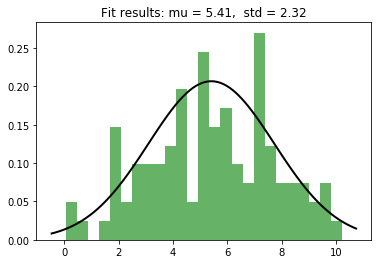

In [5]:
# Generate some data for this demonstration.
data = norm.rvs(5, 2.5, size=100)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p*1.2, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


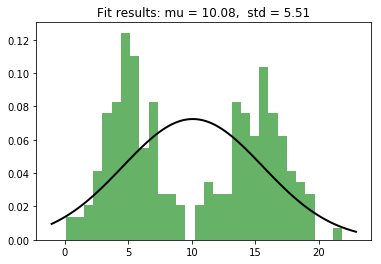

In [6]:
mu_list = []
std_list = []

# Generate some data for this demonstration.
data_1 = norm.rvs(5, 2, size=100)
data_2 = norm.rvs(15,2,size=100)

#print(type(data_1))
data = np.concatenate((data_1,data_2))

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## Multimodal Normal Distribution

/home/jaison/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


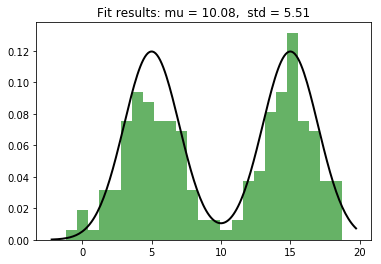

In [7]:
k = 2 # no of mixtures
mu_list = [5,15] #mus
std_list = [2,2] #sigmas
weight_list = [0.6,0.6] #weights

# Generate some data for this demonstration.
data_1 = norm.rvs(5, 2, size=100)
data_2 = norm.rvs(15,2,size=100)

data = np.concatenate((data_1,data_2))

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()


# Plot the PDF.
x = np.linspace(xmin, xmax, 200)
p=[]
for i in range(0,k):
    if p == []:
        p = norm.pdf(x, mu_list[i], std_list[i])*weight_list[i]
    else:
        p += norm.pdf(x, mu_list[i], std_list[i])*weight_list[i]

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)


plt.show()

## MIXTURE DENSITY NETWORK

In [19]:
import keras
import mdn

# This example is taken from Charles Martin's github repo :https://github.com/cpmpercussion/creative-prediction

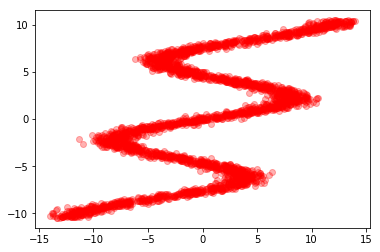

In [9]:
## Generating some data:
NSAMPLE = 3000

y_data = np.float32(np.random.uniform(-10.5, 10.5, NSAMPLE))
r_data = np.random.normal(size=NSAMPLE)
x_data = np.sin(0.75 * y_data) * 7.0 + y_data * 0.5 + r_data * 1.0
x_data = x_data.reshape((NSAMPLE, 1))

#plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', alpha=0.3)
#plt.savefig("arcsine-function.png", dpi=150, bbox_inches='tight')
plt.show()

In [10]:
N_HIDDEN = 15

model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, batch_input_shape=(None, 1), activation='tanh'))
model.add(keras.layers.Dense(N_HIDDEN, activation='tanh'))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()
history = model.fit(x=x_data, y=y_data, batch_size=128, epochs=200, validation_split=0.15)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


Train on 2550 samples, validate on 450 samples
Epoch 1/200
2550/2550 [==============================] - 2s 813us/step - loss: 35.7853 - val_loss: 32.2990
Epoch 2/200
2550/2550 [==============================] - 0s 19us/step - loss: 33.2333 - val_loss: 31.0909
Epoch 3/200
2550/2550 [==============================] - 0s 19us/step - loss: 31.9592 - val_loss: 30.3254
Epoch 4/200
2550/2550 [=============

2550/2550 [==============================] - 0s 16us/step - loss: 21.6528 - val_loss: 21.9262
Epoch 60/200
2550/2550 [==============================] - 0s 17us/step - loss: 21.6189 - val_loss: 21.8857
Epoch 61/200
2550/2550 [==============================] - 0s 14us/step - loss: 21.5993 - val_loss: 21.8840
Epoch 62/200
2550/2550 [==============================] - 0s 13us/step - loss: 21.6323 - val_loss: 22.1212
Epoch 63/200
2550/2550 [==============================] - 0s 16us/step - loss: 21.6190 - val_loss: 21.9101
Epoch 64/200
2550/2550 [==============================] - 0s 14us/step - loss: 21.6122 - val_loss: 21.9287
Epoch 65/200
2550/2550 [==============================] - 0s 14us/step - loss: 21.6129 - val_loss: 21.8917
Epoch 66/200
2550/2550 [==============================] - 0s 17us/step - loss: 21.6306 - val_loss: 21.9363
Epoch 67/200
2550/2550 [==============================] - 0s 14us/step - loss: 21.6041 - val_loss: 21.8883
Epoch 68/200
2550/2550 [==========================

2550/2550 [==============================] - 0s 15us/step - loss: 21.5582 - val_loss: 21.8733
Epoch 136/200
2550/2550 [==============================] - 0s 18us/step - loss: 21.6149 - val_loss: 21.8747
Epoch 137/200
2550/2550 [==============================] - 0s 17us/step - loss: 21.5196 - val_loss: 21.9157
Epoch 138/200
2550/2550 [==============================] - 0s 15us/step - loss: 21.5467 - val_loss: 21.8933
Epoch 139/200
2550/2550 [==============================] - 0s 17us/step - loss: 21.5554 - val_loss: 21.9978
Epoch 140/200
2550/2550 [==============================] - 0s 14us/step - loss: 21.5228 - val_loss: 21.8811
Epoch 141/200
2550/2550 [==============================] - 0s 16us/step - loss: 21.5706 - val_loss: 21.9239
Epoch 142/200
2550/2550 [==============================] - 0s 15us/step - loss: 21.5391 - val_loss: 21.8771
Epoch 143/200
2550/2550 [==============================] - 0s 15us/step - loss: 21.5570 - val_loss: 21.9158
Epoch 144/200
2550/2550 [=================

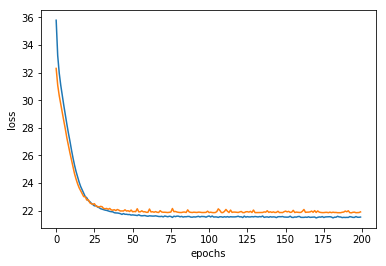

In [11]:
#plt.figure(figsize=(10, 5))
#plt.ylim([0,9])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("feedforward-mse-prediction-loss-plot.png", dpi=150, bbox_inches='tight')
plt.show()

Testing: 3000 samples.


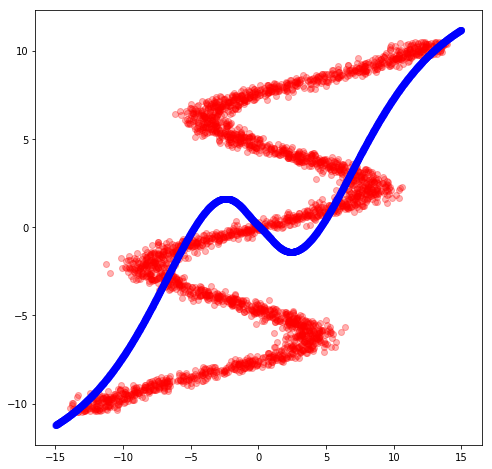

In [12]:
## Sample on some test data:
x_test = np.float32(np.arange(-15,15,0.01))
NTEST = x_test.size
print("Testing:", NTEST, "samples.")

# x_test is a big array of possible x_values to predict!
x_test = x_test.reshape(NTEST,1) # needs to be a matrix, not a vector

# Make predictions from the model - we can predict everything at once.
#y_test = model.predict(x_data)
y_test = model.predict(x_test)

# Plot the samples
plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', x_test, y_test, 'bo',alpha=0.3)
#plt.plot(x_data,y_data,'ro', x_data, y_test, 'bo',alpha=0.3)
plt.savefig("arcsine-feedforward-mse-prediction.png", dpi=150, bbox_inches='tight')
plt.show()

In [13]:
N_HIDDEN = 15
N_MIXES = 5

model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, batch_input_shape=(None, 1), activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(mdn.MDN(1, N_MIXES))
model.compile(loss=mdn.get_mixture_loss_func(1,N_MIXES), optimizer='rmsprop') #, metrics=[mdn.get_mixture_mse_accuracy(1,N_MIXES)])
model.summary()

Instructions for updating:
The `event_size` property is deprecated.  Use `num_categories` instead.  They have the same value, but `event_size` is misnamed.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
mdn_1 (MDN)                  (None, 15)                240       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x=x_data, y=y_data, batch_size=128, epochs=400, validation_split=0.15)

Train on 2550 samples, validate on 450 samples
Epoch 1/400
2550/2550 [==============================] - 1s 504us/step - loss: 6.0325 - val_loss: 5.5234
Epoch 2/400
2550/2550 [==============================] - 0s 26us/step - loss: 5.1719 - val_loss: 4.8946
Epoch 3/400
2550/2550 [==============================] - 0s 38us/step - loss: 4.6395 - val_loss: 4.4482
Epoch 4/400
2550/2550 [==============================] - 0s 45us/step - loss: 4.2467 - val_loss: 4.1070
Epoch 5/400
2550/2550 [==============================] - 0s 42us/step - loss: 3.9500 - val_loss: 3.8368
Epoch 6/400
2550/2550 [==============================] - 0s 29us/step - loss: 3.7117 - val_loss: 3.6238
Epoch 7/400
2550/2550 [==============================] - 0s 28us/step - loss: 3.5363 - val_loss: 3.4584
Epoch 8/400
2550/2550 [==============================] - 0s 26us/step - loss: 3.4023 - val_loss: 3.3337
Epoch 9/400
2550/2550 [==============================] - 0s 31us/step - loss: 3.3026 - val_loss: 3.2371
Epoch 10/400
255

2550/2550 [==============================] - 0s 33us/step - loss: 2.1710 - val_loss: 2.2162
Epoch 79/400
2550/2550 [==============================] - 0s 27us/step - loss: 2.1642 - val_loss: 2.2021
Epoch 80/400
2550/2550 [==============================] - 0s 46us/step - loss: 2.1630 - val_loss: 2.2135
Epoch 81/400
2550/2550 [==============================] - 0s 36us/step - loss: 2.1589 - val_loss: 2.2067
Epoch 82/400
2550/2550 [==============================] - 0s 22us/step - loss: 2.1600 - val_loss: 2.1847
Epoch 83/400
2550/2550 [==============================] - 0s 30us/step - loss: 2.1581 - val_loss: 2.1941
Epoch 84/400
2550/2550 [==============================] - 0s 47us/step - loss: 2.1615 - val_loss: 2.1859
Epoch 85/400
2550/2550 [==============================] - 0s 26us/step - loss: 2.1527 - val_loss: 2.2049
Epoch 86/400
2550/2550 [==============================] - 0s 24us/step - loss: 2.1507 - val_loss: 2.1883
Epoch 87/400
2550/2550 [==============================] - 0s 25us/st

2550/2550 [==============================] - 0s 33us/step - loss: 1.9910 - val_loss: 2.0601
Epoch 156/400
2550/2550 [==============================] - 0s 32us/step - loss: 1.9895 - val_loss: 2.0347
Epoch 157/400
2550/2550 [==============================] - 0s 25us/step - loss: 1.9842 - val_loss: 2.0271
Epoch 158/400
2550/2550 [==============================] - 0s 23us/step - loss: 1.9881 - val_loss: 2.0339
Epoch 159/400
2550/2550 [==============================] - 0s 22us/step - loss: 1.9895 - val_loss: 2.0280
Epoch 160/400
2550/2550 [==============================] - 0s 26us/step - loss: 1.9777 - val_loss: 2.0231
Epoch 161/400
2550/2550 [==============================] - 0s 25us/step - loss: 1.9689 - val_loss: 2.0295
Epoch 162/400
2550/2550 [==============================] - 0s 27us/step - loss: 1.9615 - val_loss: 2.0155
Epoch 163/400
2550/2550 [==============================] - 0s 40us/step - loss: 1.9625 - val_loss: 2.0088
Epoch 164/400
2550/2550 [==============================] - 0

2550/2550 [==============================] - 0s 27us/step - loss: 1.7969 - val_loss: 1.8218
Epoch 233/400
2550/2550 [==============================] - 0s 25us/step - loss: 1.7952 - val_loss: 1.8298
Epoch 234/400
2550/2550 [==============================] - 0s 25us/step - loss: 1.7861 - val_loss: 1.8407
Epoch 235/400
2550/2550 [==============================] - 0s 30us/step - loss: 1.7849 - val_loss: 1.8279
Epoch 236/400
2550/2550 [==============================] - 0s 29us/step - loss: 1.7831 - val_loss: 1.8262
Epoch 237/400
2550/2550 [==============================] - 0s 22us/step - loss: 1.7833 - val_loss: 1.8457
Epoch 238/400
2550/2550 [==============================] - 0s 21us/step - loss: 1.7727 - val_loss: 1.8178
Epoch 239/400
2550/2550 [==============================] - 0s 23us/step - loss: 1.7782 - val_loss: 1.8278
Epoch 240/400
2550/2550 [==============================] - 0s 21us/step - loss: 1.7703 - val_loss: 1.8052
Epoch 241/400
2550/2550 [==============================] - 0

2550/2550 [==============================] - 0s 25us/step - loss: 1.7365 - val_loss: 1.7950
Epoch 310/400
2550/2550 [==============================] - 0s 27us/step - loss: 1.7326 - val_loss: 1.7957
Epoch 311/400
2550/2550 [==============================] - 0s 25us/step - loss: 1.7367 - val_loss: 1.7761
Epoch 312/400
2550/2550 [==============================] - 0s 25us/step - loss: 1.7282 - val_loss: 1.7823
Epoch 313/400
2550/2550 [==============================] - 0s 26us/step - loss: 1.7376 - val_loss: 1.7899
Epoch 314/400
2550/2550 [==============================] - 0s 20us/step - loss: 1.7298 - val_loss: 1.7840
Epoch 315/400
2550/2550 [==============================] - 0s 26us/step - loss: 1.7318 - val_loss: 1.7875
Epoch 316/400
2550/2550 [==============================] - 0s 24us/step - loss: 1.7250 - val_loss: 1.7917
Epoch 317/400
2550/2550 [==============================] - 0s 21us/step - loss: 1.7359 - val_loss: 1.7643
Epoch 318/400
2550/2550 [==============================] - 0

2550/2550 [==============================] - 0s 36us/step - loss: 1.6681 - val_loss: 1.7321
Epoch 387/400
2550/2550 [==============================] - 0s 47us/step - loss: 1.6653 - val_loss: 1.7251
Epoch 388/400
2550/2550 [==============================] - 0s 34us/step - loss: 1.6607 - val_loss: 1.7342
Epoch 389/400
2550/2550 [==============================] - 0s 23us/step - loss: 1.6572 - val_loss: 1.7321
Epoch 390/400
2550/2550 [==============================] - 0s 22us/step - loss: 1.6446 - val_loss: 1.7306
Epoch 391/400
2550/2550 [==============================] - 0s 26us/step - loss: 1.6549 - val_loss: 1.7357
Epoch 392/400
2550/2550 [==============================] - 0s 37us/step - loss: 1.6516 - val_loss: 1.7391
Epoch 393/400
2550/2550 [==============================] - 0s 46us/step - loss: 1.6535 - val_loss: 1.7105
Epoch 394/400
2550/2550 [==============================] - 0s 36us/step - loss: 1.6460 - val_loss: 1.7225
Epoch 395/400
2550/2550 [==============================] - 0

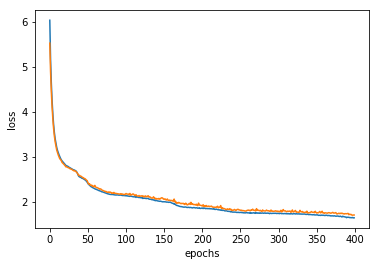

In [15]:
#plt.figure(figsize=(10, 5))
#plt.ylim([0,9])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("arcsine-feedforward-mdn-loss.png", dpi=150, bbox_inches='tight')
plt.show()

In [16]:
## Sample on some test data:
x_test = np.float32(np.arange(-15,15,0.01))
NTEST = x_test.size
print("Testing:", NTEST, "samples.")

# x_test is a big array of possible x_values to predict!
x_test = x_test.reshape(NTEST,1) # needs to be a matrix, not a vector

# Make predictions from the model - we can predict everything at once.
y_test = model.predict(x_test)


print(y_test.shape)
# y_test contains parameters for distributions, not actual points on the graph.
# To find points on the graph, we need to sample from each distribution.

# Sample from the predicted distributions
y_samples = np.apply_along_axis(mdn.sample_from_output, 1, y_test, 1, N_MIXES,temp=1.0)

# Split up the mixture parameters
mus = np.apply_along_axis((lambda a: a[:N_MIXES]),1, y_test)
sigs = np.apply_along_axis((lambda a: a[N_MIXES:2*N_MIXES]),1, y_test)
pis = np.apply_along_axis((lambda a: mdn.softmax(a[2*N_MIXES:])),1, y_test)

Testing: 3000 samples.
(3000, 15)


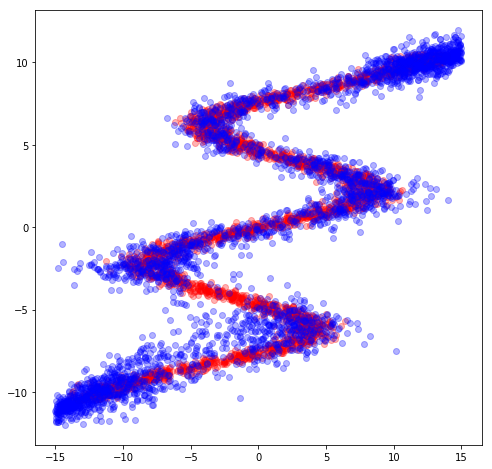

In [17]:
# Plot the samples
plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', x_test, y_samples[:,:,0], 'bo',alpha=0.3)
plt.savefig("arcsine-feedforward-mdn-predictions.png", dpi=150, bbox_inches='tight')
plt.show()


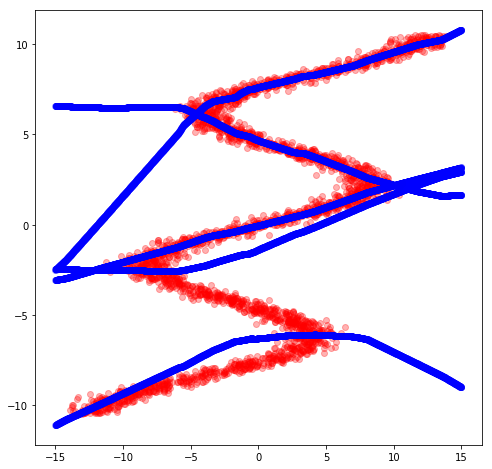

In [18]:
# Plot the samples
plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', x_test, mus, 'bo',alpha=0.3)
plt.savefig("arcsine-feedforward-mdn-predictions.png", dpi=150, bbox_inches='tight')
plt.show()


In [ ]:
from keras import backend as K
from keras.layers import Dense, Input, Concatenate
from keras.models import Model
from keras.engine.topology import Layer
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [ ]:
def elu_plus_one_plus_epsilon(x):
    """ELU activation with a very small addition to help prevent NaN in loss."""
    return (K.elu(x) + 1 + 1e-8)

N_HIDDEN = 15
N_MIXES = 5

inputs = Input(shape=(1,), name='inputs')
hidden1 = Dense(N_HIDDEN, activation='relu', name='hidden1')(inputs)
hidden2 = Dense(N_HIDDEN, activation='relu', name='hidden2')(hidden1)

mdn_mus = Dense(N_MIXES, name='mdn_mus')(hidden2)
mdn_sigmas = Dense(N_MIXES, activation=elu_plus_one_plus_epsilon, name='mdn_sigmas')(hidden2)
mdn_pi = Dense(N_MIXES, name='mdn_pi')(hidden2)

mdn_out = Concatenate(name='mdn_outputs')([mdn_mus, mdn_sigmas, mdn_pi])

model = Model(inputs=inputs, outputs=mdn_out)
model.summary()

In [ ]:
def mdn_loss(y_true, y_pred):
    # Split the inputs into paramaters
    out_mu, out_sigma, out_pi = tf.split(y_pred, num_or_size_splits=[N_MIXES, N_MIXES, N_MIXES],
                                         axis=-1, name='mdn_coef_split')
    mus = tf.split(out_mu, num_or_size_splits=N_MIXES, axis=1)
    sigs = tf.split(out_sigma, num_or_size_splits=N_MIXES, axis=1)
    # Construct the mixture models
    cat = tfd.Categorical(logits=out_pi)
    coll = [tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale) for loc, scale
            in zip(mus, sigs)]
    mixture = tfd.Mixture(cat=cat, components=coll)
    # Calculate the loss function
    loss = mixture.log_prob(y_true)
    loss = tf.negative(loss)
    loss = tf.reduce_mean(loss)
    return loss

In [ ]:
history = model.fit(x=x_data, y=y_data, batch_size=128, epochs=400, validation_split=0.15)